In [30]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Set a seed for reproducibility
np.random.seed(2)

# Generate synthetic survey data
age_groups = np.random.choice(['12-15', '16-18', '19-21', '22-25'], 100)
community_engagement = np.random.choice([1, 2, 3, 4, 5], 100)  # Likert scale
preferred_event = np.random.choice(['Sports', 'Music', 'Workshops', 'Networking'], 100)
volunteered = np.random.choice(['Yes', 'No'], 100)

# Create a DataFrame
survey_data = pd.DataFrame({
    'Age Group': age_groups,
    'Community Engagement Score': community_engagement,
    'Preferred Event Type': preferred_event,
    'Volunteered in Past Year': volunteered
})

# Set 'Age Group' as an ordered categorical variable
age_order = ['12-15', '16-18', '19-21', '22-25']
survey_data['Age Group'] = pd.Categorical(survey_data['Age Group'], categories=age_order, ordered=True)




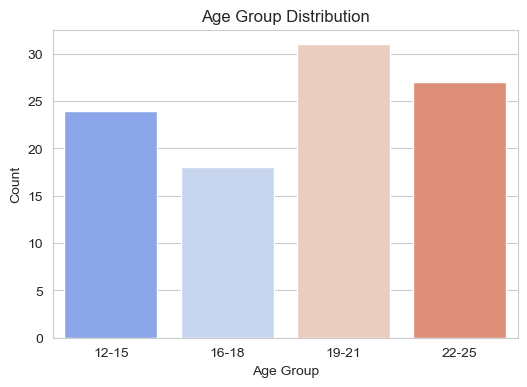

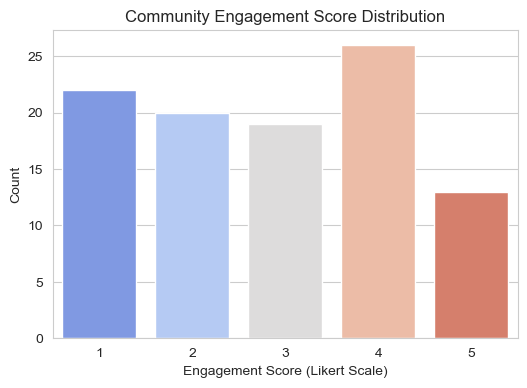

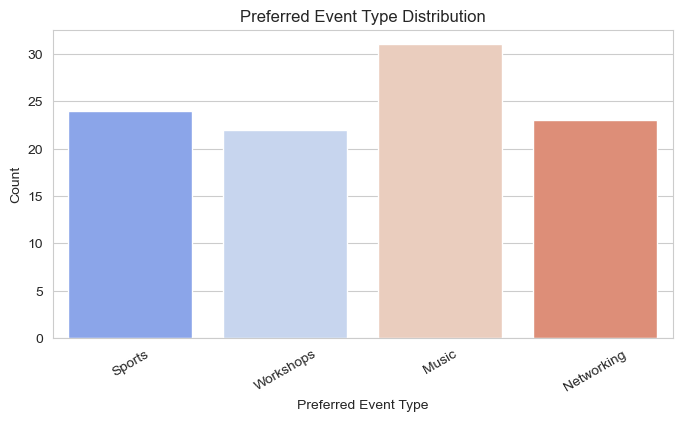

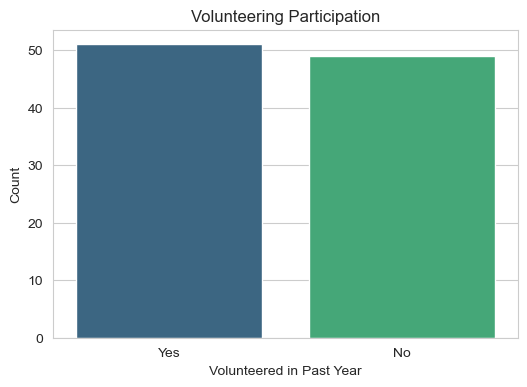

In [32]:
# --- Data Visualizations ---

# Set Seaborn style for consistency in visualizations
sns.set_style("whitegrid")

# Age Group Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=survey_data, x="Age Group", order=age_order, palette="coolwarm")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Community Engagement Score Distribution (Likert Scale)
plt.figure(figsize=(6, 4))
sns.countplot(data=survey_data, x="Community Engagement Score", palette="coolwarm")
plt.title("Community Engagement Score Distribution")
plt.xlabel("Engagement Score (Likert Scale)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[1, 2, 3, 4, 5])  # Correct Likert labels
plt.show()

# Preferred Event Type Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=survey_data, x="Preferred Event Type", palette="coolwarm")
plt.title("Preferred Event Type Distribution")
plt.xlabel("Preferred Event Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# Volunteering Participation
plt.figure(figsize=(6, 4))
sns.countplot(data=survey_data, x="Volunteered in Past Year", palette="viridis")
plt.title("Volunteering Participation")
plt.xlabel("Volunteered in Past Year")
plt.ylabel("Count")
plt.show()


Kruskal-Wallis test statistic: 7.530181763307066, p-value: 0.056788003685297524


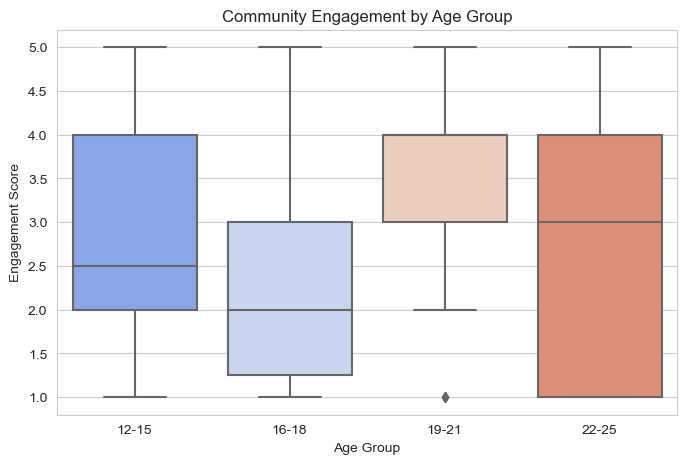

In [34]:
# Kruskal-Wallis Test: Age Group vs Community Engagement Score
kw_test = kruskal(*[survey_data.loc[survey_data['Age Group'] == group, 'Community Engagement Score'] for group in survey_data['Age Group'].unique()])
print(f"Kruskal-Wallis test statistic: {kw_test.statistic}, p-value: {kw_test.pvalue}")

# Boxplot: Community Engagement by Age Group
plt.figure(figsize=(8, 5))
sns.boxplot(data=survey_data, x="Age Group", y="Community Engagement Score", order=age_order, palette="coolwarm")
plt.title("Community Engagement by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Engagement Score")
plt.show()

Chi-square test statistic: 20.028472086709847, p-value: 0.017737503683378442, degrees of freedom: 9
Contingency Table:
 Preferred Event Type  Music  Networking  Sports  Workshops
Age Group                                                 
12-15                     6           6       7          5
16-18                     5           2       1         10
19-21                    11           6      11          3
22-25                     9           9       5          4
Expected Counts:
 [[7.44 5.52 5.76 5.28]
 [5.58 4.14 4.32 3.96]
 [9.61 7.13 7.44 6.82]
 [8.37 6.21 6.48 5.94]]


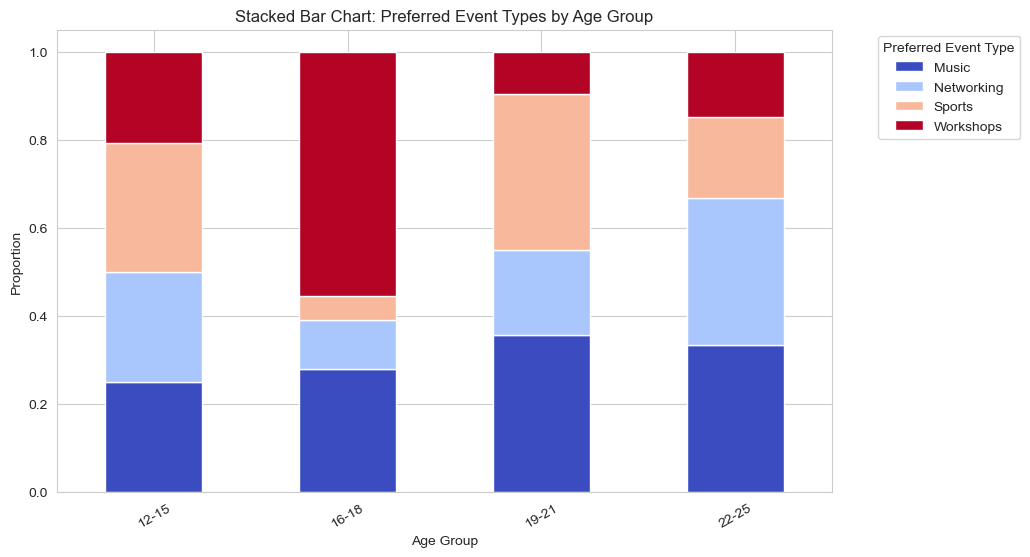

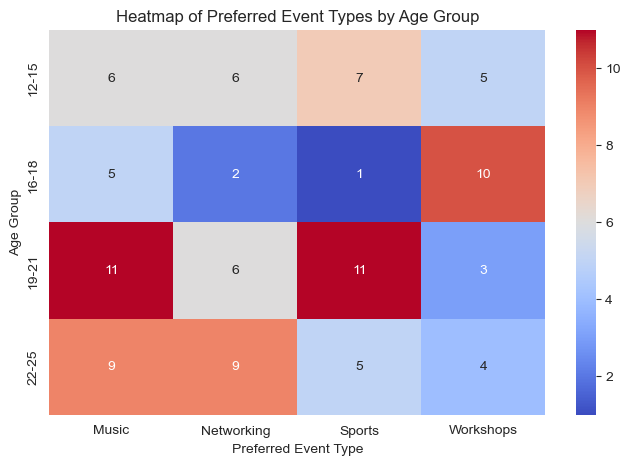

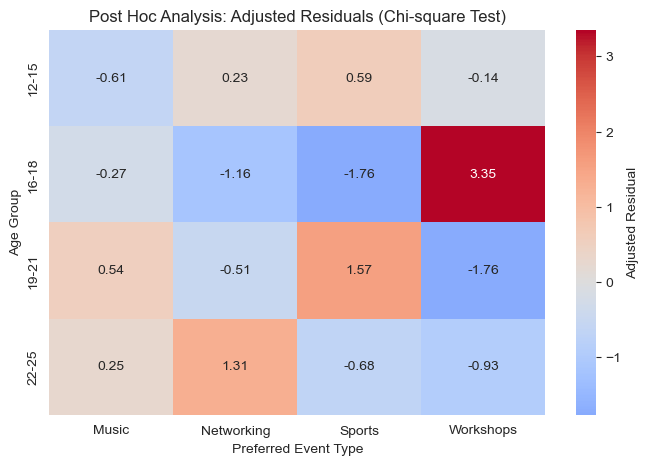

Bonferroni-corrected significance threshold: 2.96
Significant cells (True = significant difference):
 Preferred Event Type  Music  Networking  Sports  Workshops
Age Group                                                 
12-15                 False       False   False      False
16-18                 False       False   False       True
19-21                 False       False   False      False
22-25                 False       False   False      False


In [35]:
# Chi-square Test: Age Group vs Preferred Event Type
contingency_table = pd.crosstab(survey_data['Age Group'], survey_data['Preferred Event Type'])
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test statistic: {chi2_stat}, p-value: {p}, degrees of freedom: {dof}")
print("Contingency Table:\n", contingency_table)
print("Expected Counts:\n", expected)

# Stacked Bar Chart: Proportion of Preferred Event Types by Age Group
event_counts = pd.crosstab(survey_data["Age Group"], survey_data["Preferred Event Type"])
event_counts_norm = event_counts.div(event_counts.sum(axis=1), axis=0)  # Normalize counts to proportions
event_counts_norm.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))

plt.title("Stacked Bar Chart: Preferred Event Types by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Preferred Event Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=30)
plt.show()

# Heatmap: Contingency Table for Chi-Square Test
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap of Preferred Event Types by Age Group")
plt.xlabel("Preferred Event Type")
plt.ylabel("Age Group")
plt.show()

# Post-hoc analysis using Adjusted Residuals for Chi-Square Test
residuals = (contingency_table - expected) / np.sqrt(expected)  # Standardized residuals
adjusted_residuals = residuals / np.sqrt(1 - contingency_table.sum(axis=1).values[:, np.newaxis] / contingency_table.values.sum())

# Bonferroni correction for multiple comparisons
alpha = 0.05
num_comparisons = contingency_table.shape[0] * contingency_table.shape[1]
bonferroni_corrected_alpha = alpha / num_comparisons
significance_threshold = stats.norm.ppf(1 - bonferroni_corrected_alpha / 2)  # Two-tailed test

# Plot heatmap of adjusted residuals
plt.figure(figsize=(8, 5))
sns.heatmap(adjusted_residuals, annot=True, cmap="coolwarm", center=0, fmt=".2f", cbar_kws={'label': 'Adjusted Residual'})
plt.title("Post Hoc Analysis: Adjusted Residuals (Chi-square Test)")
plt.xlabel("Preferred Event Type")
plt.ylabel("Age Group")
plt.show()

# Significant Residuals
significant_cells = (adjusted_residuals.abs() > significance_threshold)
print(f"Bonferroni-corrected significance threshold: {significance_threshold:.2f}")
print("Significant cells (True = significant difference):\n", significant_cells)

Chi-square test statistic: 1.8597881207441154, p-value: 0.602011584121037, degrees of freedom: 3
Contingency Table (Volunteering):
 Volunteered in Past Year  No  Yes
Age Group                        
12-15                     11   13
16-18                      9    9
19-21                     13   18
22-25                     16   11
Expected Counts (Volunteering):
 [[11.76 12.24]
 [ 8.82  9.18]
 [15.19 15.81]
 [13.23 13.77]]


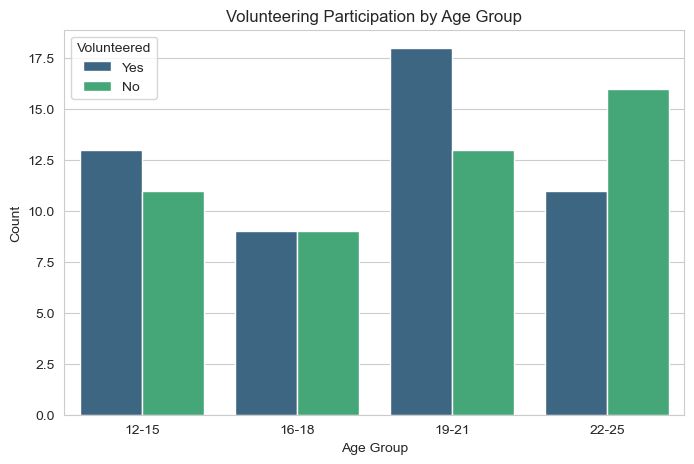

In [37]:
# Chi-square Test: Age Group vs Volunteering Participation
contingency_table_volunteering = pd.crosstab(survey_data['Age Group'], survey_data['Volunteered in Past Year'])
chi2_stat_vol, p_vol, dof_vol, expected_vol = chi2_contingency(contingency_table_volunteering)
print(f"Chi-square test statistic: {chi2_stat_vol}, p-value: {p_vol}, degrees of freedom: {dof_vol}")
print("Contingency Table (Volunteering):\n", contingency_table_volunteering)
print("Expected Counts (Volunteering):\n", expected_vol)

# Bar Plot: Volunteering Participation by Age Group
plt.figure(figsize=(8, 5))
sns.countplot(data=survey_data, x="Age Group", hue="Volunteered in Past Year", order=age_order, palette="viridis")
plt.title("Volunteering Participation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Volunteered")
plt.show()